In [7]:
import numpy as np
import pandas as pd
import re
from collections import Counter
import unicodedata
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('unidades.csv')

# Display the first few rows to verify data
df.head()

# Define a function to remove accents
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return "".join([c for c in nfkd_form if not unicodedata.combining(c)])

# Define synonyms
synonyms = {
    'gab': 'gabinete',
    'gab.': 'gabinete',
    'presidencia': 'presidencia',
    'v': 'vara',
    'vio': 'violencia',
    'c': 'circunscricao',
    'juiza' : 'juiz',
    'substituta' : 'substituto',

    'faz': 'fazenda',
    'fam': 'familia',

    'exma' : 'exmo',

    'reg': 'registros',

    'pub': 'publico',

    'juv': 'juventude',
    'inf': 'infancia',

    'crim': 'criminal',
    'DEECRIM': 'criminal',

    'adj' : 'adjunto',
    'cons': 'consumo',

    'jef': 'federal',
    'jud': 'judiciario',

    'desembargadora': 'desembargador',
    'des' : 'desembargador',
    'desa': 'desembargador',
    'desemb': 'desembargador',

    'j': 'juizado',
    'jui': 'juizado',

    'civ': 'civel',
    'esp': 'especial',
    'especiais': 'especial',

    'contadoria/tesouraria' : 'contadoria',


    # Add more synonyms as needed
}

# Define multi-token replacements
multi_token_replacements = {
    'vt': ['vara', 'trabalho'],
    'cejusc' :['centro','judicial','solucao','conflitos','cidadania'],
    'tr': ['turma', 'recursal'],
    'jit': ['juizado', 'especial','civel'],
    'gades': ['gabinete', 'desembargador'],
    'jesp': ['juizado', 'especial','criminal'],
    'jec': ['juizado', 'especial','civel'],
    'saf': ['servico', 'anexo','fazendas'],
    # Add more multi-token replacements as needed
}

# Function to replace synonyms and multi-token replacements
def replace_synonyms_and_multi_tokens(token):
    if token in multi_token_replacements:
        return multi_token_replacements[token]
    else:
        return [synonyms.get(token, token)]

# Tokenization function
def tokenize_name(name, additional_stopwords=None):
    name = remove_accents(name).lower()
    
    # REPLACE 'CJ' OR 'C J' WITH 'CIRCUNSCRICAO JUDICIAL'
    name = re.sub(r'\bc\s*j\b', 'circunscricao', name)
    
    # REMOVE NUMBERS AND NUMBER-LETTER COMBINATIONS, BUT KEEP THE PRECEDING WORD
    name = re.sub(r'\b(\d+\w*)\b', '', name)
    
    # COMBINE 'GRAU' WITH THE PRECEDING WORD
    name = re.sub(r'(\b\w+\b)\s+grau', r'\1_grau', name)
    
    # COMBINE 'VICE' WITH THE FOLLOWING WORD (WITH SPACE OR HYPHEN) INTO A SINGLE TOKEN
    name = re.sub(r'\b(vice)[-\s]+(\w+)', r'\1_\2', name)
    
    tokens = re.split(r'\s|,|\.|\(|\)|-', name)

    stopwords = ['de', 'da', 'do', 'das', 'dos', 
                 'e', 'a', 'o', 'i', 'u', 'b', 'as', 'ao',
                 '"', 'em', 'des', 'com', 'n',
                 'rio', 'paulo', 'sao', 'bom', 'monte', 'montes', 'jesus', 'boa', 'ponta',
                 'joao', 'jose', 'maria', 'santa','ferreira', 'martins', 'alves','antonio','luis', 'santos',
                 'porto', 'belo', 'nova', 'sul', 'campo', 'oliveira','luiz','fortaleza', 'goiania', 'curitiba', 'silvia',
                 'carlos','grande','silva','francisco', 'pedro', 'lucas','ana', 'francisca', 'antonia','juliana', 'julia','fernando',
                 'fernanda','marcos','gabriel','adriana','marcia','souza','sousa','rodrigues','aves','pereira','lima','costa',
                 'dr','dra', 'janeiro','vitoria','salvador','brasilia','fortaleza','horizonte','manaus','curitiba','recife','goiania',
                 'santo','campos','filho','natal', 'primeira', 'segunda','iguacu','santana', 'preto','barra','funda','alegre',
                 'alegre/rs','norte','cruz','sr', 'sra', 'cuiaba','belem','paulista','serra','ribeirao','neto','piaui','eduardo','roberto',
                 'caxias','campinas','terceira','sul/rs','branco','almeida','novo','miguel','andre','carvalho','londrina','guarulhos',
                 'goncalo', 'aparecida', 'sebastiao','teresina','/','ribeiro','gomes','campina','augusto','verde', 'ii','i','iii',
                 'ricardo', 'bernardo','niteroi', 'vila','maringa','rocha','alberto','sorocaba','uberlandia','dois','tres','oeste','leste',
                 'ap','amaro','cesar','machado','jorge','castro', 'marcelo', 'minas','henrique', 'cabo','vista','guimaraes', 'alexandre',
                 'aracaju', 'cascavel', 'vicente', 'assis', 'lopes', 'velho', 'moraes', 'goncalves', 'conceicao', 'foz','franca','neves',
                 'mendes','marques', 'cruzes', 'mogi', "em grau", 'grossa','feira', 'mesquita', 'rosa', 'junior','teixeira', 'jardim',
                 'lagoas', 'fernandes', 'varzea', 'pinheiro', 'duque', 'aguas', 'goias', 'araujo', 'barbosa', 'nogueira', 'cristina',
                 'guararapes', 'taguatinga', 'dias', 'helena', 'bauru', 'cunha', 'quarta','penas', 'sergio', 'soares', 'joinville',
                 'claro','andrade', 'macapa', 'gama', 'pinto', 'mt', 'juazeiro', 'batista', 'jaboatao', 'ms', 'freitas', 'vieira', 'palmas',
                 'mossoro', 'osasco', 'piracicaba', 'joaquim', 'patos', 'vida', 'pinhais', 'petropolis', 'marco', 'saude', 'coelho', 'reis',
                 'lucia', 'fonseca', 'branca', 'olinda', 'anapolis', 'parnaiba', 'df', 'aracatuba', 'toledo', 'claudio', 'leite', 'fora', 'caldas',
                 'rita','claros','afonso','ramos','caruaru','correa','araraquara','marilia','bento','azevedo','manoel','meriti','pai','velha',
                 'ze','naroja','divinopolis','paraiso']
    if additional_stopwords:
        stopwords.extend(additional_stopwords)
    
    # PROCESS EACH TOKEN, APPLYING SYNONYMS AND MULTI-TOKEN REPLACEMENTS
    processed_tokens = []
    skip_next = False
    for i, token in enumerate(tokens):
        if skip_next:
            skip_next = False
            continue
        if token and token not in stopwords:
            # HANDLE CASE WHERE 'C' IS FOLLOWED BY 'J'
            if token == 'c' and i + 1 < len(tokens) and tokens[i + 1] == 'j':
                processed_tokens.append('circunscricao')
                skip_next = True
            else:
                processed_tokens.extend(replace_synonyms_and_multi_tokens(token))
    
    # REPLACE UNDERSCORES WITH SPACES IN PRESERVED CONJOINED EXPRESSIONS
    processed_tokens = [token.replace('_', ' ') for token in processed_tokens]
    return processed_tokens

# Apply tokenization
df['tokens'] = df['nomeUnidade'].apply(lambda x: tokenize_name(x))

# Flatten list of tokens
all_tokens = [token for sublist in df['tokens'] for token in sublist]

# Calculate frequency of each token
token_counts = Counter(all_tokens)
common_tokens = token_counts.most_common()

# Convert to DataFrame for visualization
token_df = pd.DataFrame(common_tokens, columns=['token', 'count'])

print(f"Number of disparate tokens: {len(set(all_tokens))}")

# Display the DataFrame
token_df.head(212)


Number of disparate tokens: 8479


,token,count
0,vara,12069
1,civel,6235
2,gabinete,5455
3,criminal,4245
4,comarca,4212
...,...,...
207,cartas,44
208,passo,44
209,adm,43
210,instancia,43


In [8]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate expressivity ratio
def calculate_expressivity_ratio(word, group, token_stats):
    word_count = token_stats[word]['count']
    cooccurrence_count = sum(token_stats[word]['cooccurrences'].get(token, 0) for token in group)
    return 1 - (cooccurrence_count / word_count) if word_count > 0 else 0

# Initial group creation
def create_initial_groups(tokens, token_stats):
    groups = []
    for word in tokens:
        best_group = None
        best_expressivity = 0
        for group in groups:
            expressivity = calculate_expressivity_ratio(word, group, token_stats)
            if expressivity > best_expressivity:
                best_group = group
                best_expressivity = expressivity
        if best_group:
            best_group.append(word)
        else:
            groups.append([word])
    return groups

# Iterative group optimization
def optimize_groups(groups, token_stats):
    improved = True
    while improved:
        improved = False
        for group in groups:
            for word in group:
                current_expressivity = calculate_expressivity_ratio(word, group, token_stats)
                best_group = group
                best_expressivity = current_expressivity
                for other_group in groups:
                    if other_group != group:
                        expressivity = calculate_expressivity_ratio(word, other_group, token_stats)
                        if expressivity > best_expressivity:
                            best_group = other_group
                            best_expressivity = expressivity
                if best_group != group:
                    group.remove(word)
                    best_group.append(word)
                    improved = True
    return groups

# Function to order elements within groups by expressivity ratio
def order_elements_by_expressivity(groups, token_stats):
    ordered_groups = []
    for group in groups:
        ordered_group = sorted(group, key=lambda x: calculate_expressivity_ratio(x, group, token_stats), reverse=True)
        ordered_groups.append(ordered_group)
    return ordered_groups

# Function to assign hierarchical names to groups
def assign_hierarchy_names(groups):
    hierarchy_names = ['Domain', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus']
    sorted_groups = sorted(groups, key=len)
    named_groups = {hierarchy_names[i]: sorted_groups[i] for i in range(len(groups))}
    return named_groups

# Example usage
tokens = [token for token, count in token_counts.most_common(205)]
token_stats = {token: {'count': count, 'cooccurrences': defaultdict(int)} for token, count in token_counts.items()}

for tokens_row in df['tokens']:
    for token in tokens_row:
        if token in token_stats:
            for co_token in tokens_row:
                if co_token != token:
                    token_stats[token]['cooccurrences'][co_token] += 1

initial_groups = create_initial_groups(tokens, token_stats)
optimized_groups = optimize_groups(initial_groups, token_stats)

# Order elements by expressivity ratio
ordered_groups = order_elements_by_expressivity(optimized_groups, token_stats)

# Assign hierarchical names to groups
hierarchical_groups = assign_hierarchy_names(ordered_groups)

# Display the hierarchical groups
for name, group in hierarchical_groups.items():
    print(f"{name}: {group}")

# Calculate and print the average expressivity ratio
def calculate_average_expressivity(groups, token_stats):
    total_expressivity = 0
    total_tokens = 0
    for group in groups:
        for token in group:
            expressivity = calculate_expressivity_ratio(token, group, token_stats)
            total_expressivity += expressivity
            total_tokens += 1
    return total_expressivity / total_tokens if total_tokens > 0 else 0

average_expressivity = calculate_average_expressivity(ordered_groups, token_stats)
print(f"Average expressivity ratio: {average_expressivity:.2f}")

# Print the number of disparate (unique) tokens
print(f"Number of disparate tokens: {len(set(all_tokens))}")

Domain: ['jurisprudencia', 'extraordinaria', 'vice presidencia', 'camaras', 'orgao', 'protocolo', 'centro', 'cartorio', 'juiz', 'judiciaria', 'controle', 'vara', 'processamento', 'apoio', 'unificada', 'consumidor', 'juizado', 'prudente']
Kingdom: ['coman', 'tutelar', 'ativa', 'operacional', 'mista', 'vinculada', 'pericias', 'gabinete', 'proger', 'diretoria', 'processual', 'distribuicao', 'servico', 'judiciario', 'civel', 'turmas', 'virtual', 'contra', 'pg3', 'execucao', 'justica', 'criminais', 'civeis', 'sucessoes', 'publicos']
Phylum: ['dtr', 'trf', 'substituto', 'camara', 'unica', 'auxiliar', 'assessoria', 'secao', 'sede', 'nucleo', 'recursal', 'itinerante', 'divisao', 'consumo', 'violencia', 'pre', 'central', 'tribunal', 'uniformizacao', 'alto', 'inativo', 'fazenda', 'posto', 'coordenadoria', 'fazendas', 'governador', 'infancia', 'contagem', 'penais', 'penal']
Class: ['cumulativa', 'plena', 'bacenjud', 'ssj', 'dcp', 'microrregiao', 'titular', 'custodia', 'auditoria', 'eleitoral', 'c

In [9]:
# Function to categorize tokens based on hierarchical groups
def categorize_token_by_hierarchy(token, hierarchical_groups):
    for name, group in hierarchical_groups.items():
        if token in group:
            return name
    return 'other'

# Apply new categorization
token_df['category'] = token_df['token'].apply(lambda x: categorize_token_by_hierarchy(x, hierarchical_groups))

# Display the categorized DataFrame
token_df.head()

,token,count,category
0,vara,12069,Domain
1,civel,6235,Kingdom
2,gabinete,5455,Kingdom
3,criminal,4245,Genus
4,comarca,4212,Order


[('Domain', 0.8984329011786978), ('Kingdom', 0.879675657140392), ('Phylum', 0.8836122195835083), ('Class', 0.9154572097426573), ('Order', 0.8735724267936003), ('Family', 0.8799311325864965), ('Genus', 0.7985754973167986)]
Average expressivity ratio: 0.8756081491917359


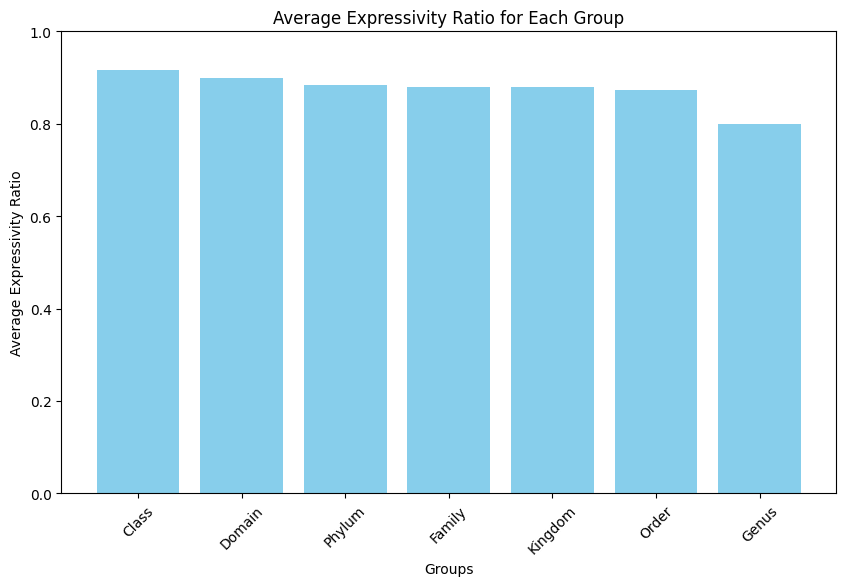

In [10]:
# Function to calculate the average expressivity ratio for each group
def calculate_group_expressivity_ratios(hierarchical_groups, token_stats):
    group_expressivity_ratios = []
    
    for group_name, group in hierarchical_groups.items():
        expressivity_ratios = []
        for token in group:
            word_count = token_stats[token]['count']
            cooccurrence_count = sum(token_stats[token]['cooccurrences'].get(other_token, 0) for other_token in group if other_token != token)
            expressivity_ratio = 1 - (cooccurrence_count / word_count) if word_count > 0 else 0
            expressivity_ratios.append(expressivity_ratio)
        
        if expressivity_ratios:
            average_expressivity_ratio = sum(expressivity_ratios) / len(expressivity_ratios)
        else:
            average_expressivity_ratio = 0
        
        group_expressivity_ratios.append((group_name, average_expressivity_ratio))
    print(group_expressivity_ratios)
    return group_expressivity_ratios

# Calculate average expressivity ratios for each group
group_expressivity_ratios = calculate_group_expressivity_ratios(hierarchical_groups, token_stats)

print(f"Average expressivity ratio: {np.average([ratio for _, ratio in group_expressivity_ratios]):}")





# Plot the average expressivity ratios for each group
def plot_group_expressivity_ratios(group_expressivity_ratios):
    group_expressivity_ratios.sort(key=lambda x: x[1], reverse=True)
    group_labels, ratios = zip(*group_expressivity_ratios)
    plt.figure(figsize=(10, 6))
    plt.bar(group_labels, ratios, color='skyblue')
    plt.xlabel('Groups')
    plt.ylabel('Average Expressivity Ratio')
    plt.title('Average Expressivity Ratio for Each Group')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()

# Example usage:
plot_group_expressivity_ratios(group_expressivity_ratios)


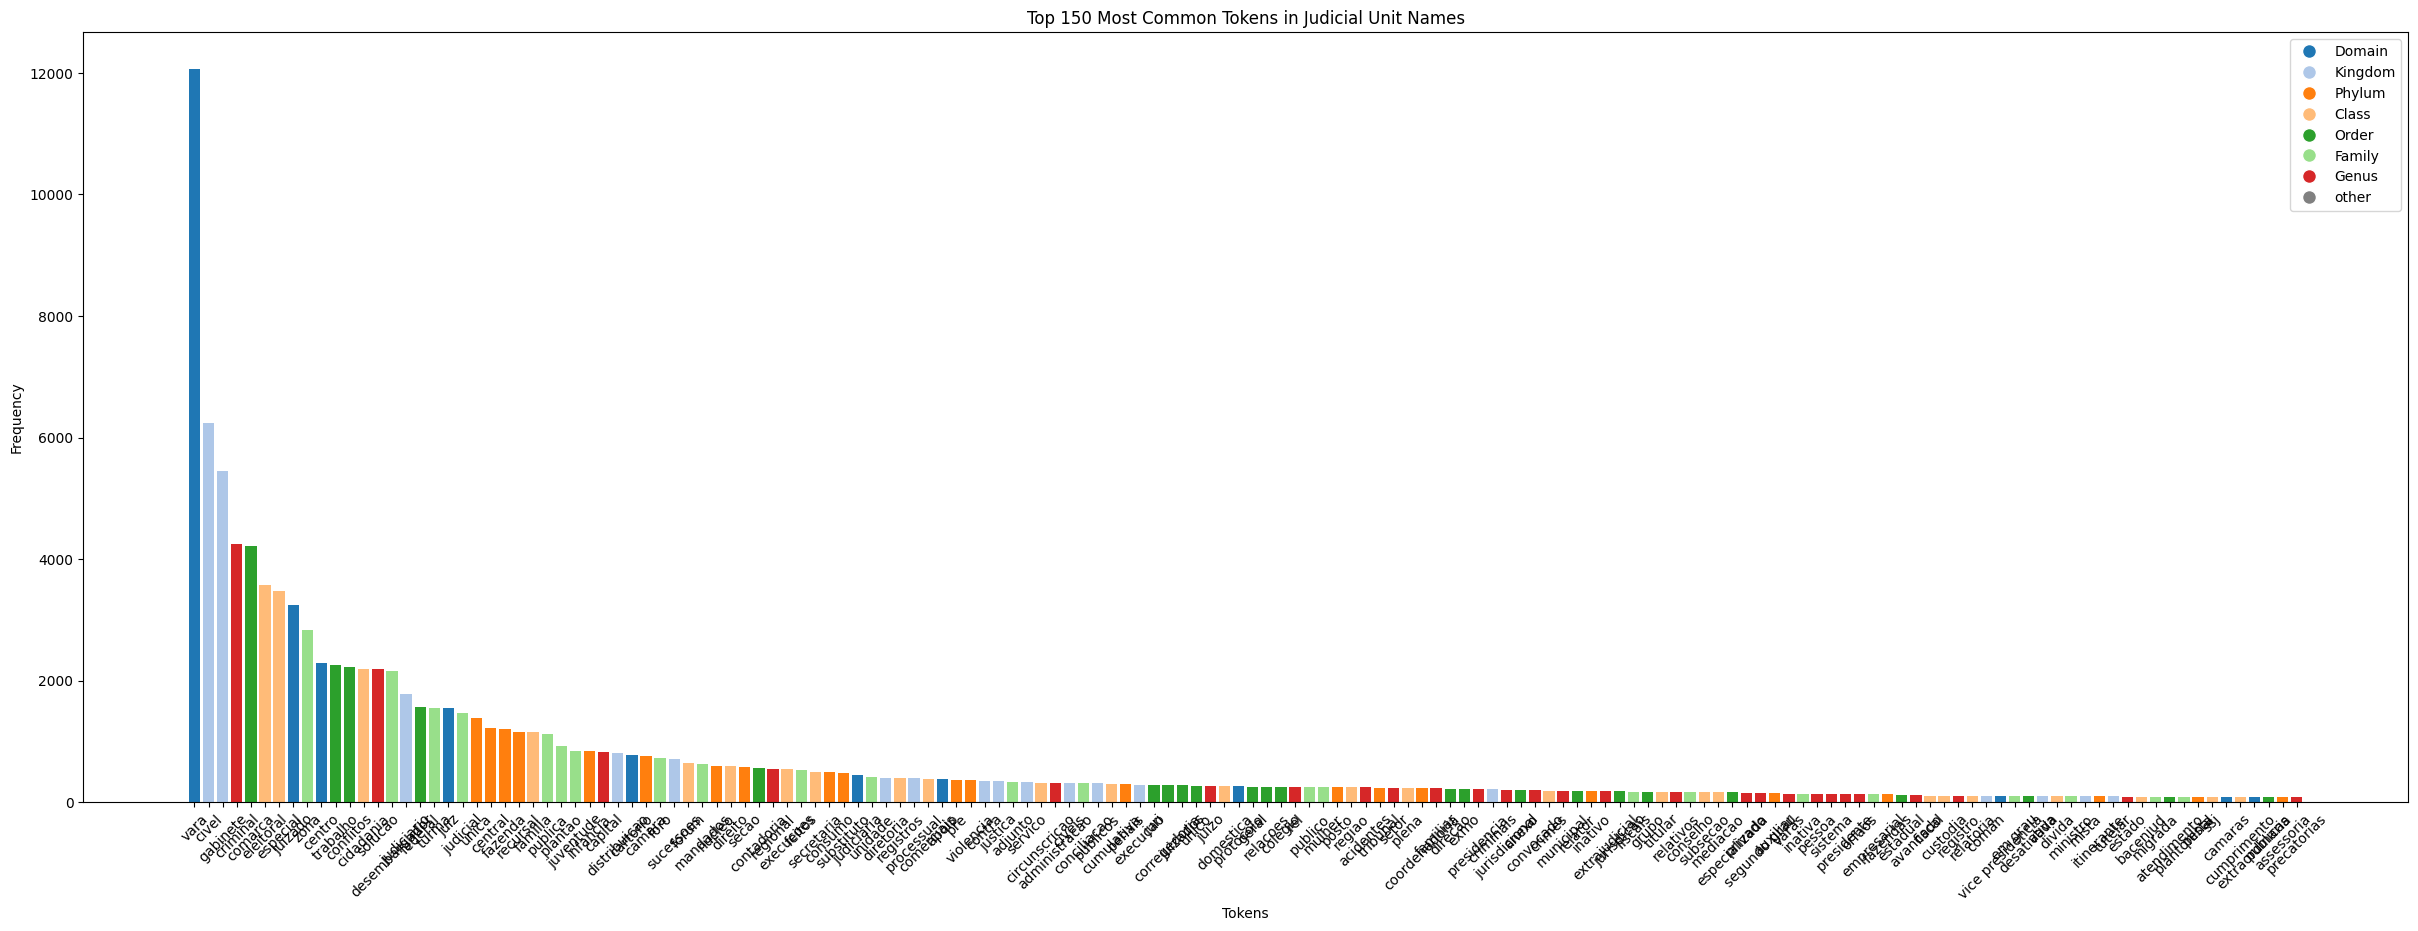

In [11]:
# Define colors for categories based on hierarchical names
group_colors = {name: plt.cm.tab20(i) for i, name in enumerate(hierarchical_groups.keys())}
group_colors['other'] = 'gray'

# Plot the most common tokens with colors
def plot_common_tokens(token_df, hierarchical_groups, top_n=150):
    top_tokens = token_df.head(top_n)
    colors = [group_colors.get(category, 'gray') for category in top_tokens['category']]
    
    plt.figure(figsize=(30, 10))
    plt.bar(top_tokens['token'], top_tokens['count'], color=colors)
    plt.xlabel('Tokens')
    plt.ylabel('Frequency')
    plt.title('Top {} Most Common Tokens in Judicial Unit Names'.format(top_n))
    plt.xticks(rotation=45)
    
    # Create custom legend
    legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=category) 
                      for category, color in group_colors.items()]
    plt.legend(handles=legend_patches)
    
    plt.show()

# Example usage:
plot_common_tokens(token_df, hierarchical_groups)


In [12]:
import csv

# Export groups to CSV
with open('hierarchical_groups.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Level', 'Token'])
    for name, group in hierarchical_groups.items():
        for token in group:
            writer.writerow([name, token])